# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

**The sales data has the following fields:**
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

Using the techniques of data analysis, preprocessing, and visualizations.

## 📚 LOAD PACKAGES

we will be loading all the packages which are required to our analysis

In [ ]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

In [ ]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## 📁 Load the Dataframe

The sales data is present at the location `data/sales_data.csv`, the columns attributes are described above.

In [ ]:
# Load the data

sales = pd.read_csv('./data/sales_data.csv', parse_dates=['date'])
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


As, we can see that there are about 8 columns, with names which are self-explanatory

## 📊 Exploratory Data Analysis

In [ ]:
# A Quick glimpse of the data

sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


There are a total of 1000 entries of the sales data, with no missing values in any of the columns

Now, Let's check about the duplicate values in the data

In [ ]:
# Are there any duplicate values?

dups = sales[sales.duplicated()]
print(f"Number of duplicate values in the data are: {len(dups)}")

Number of duplicate values in the data are: 0


Let's make the histogram of the numeric variables, to understand it's distribution much better

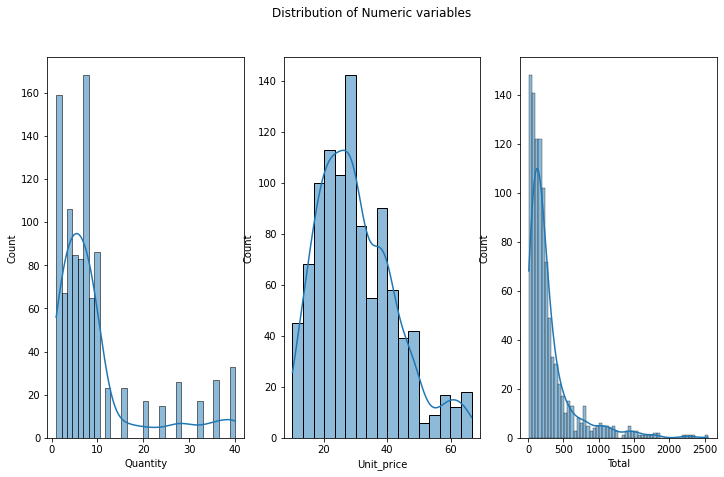

In [ ]:
# Make a histogram of numeric variables

num_cols = [col for col in sales.columns if sales[col].dtype in ['float64', 'int64']]

fig, ax = plt.subplots(1, 3)

fig.suptitle("Distribution of Numeric variables")

for i, col in enumerate(num_cols):
    ax[i].set_xlabel(col.capitalize())
    sns.histplot(x=col, data=sales, ax=ax[i], kde=True)

Looks like, the distributions of all numeric values are left skewed, log transformation will make it much better and suitable as a feature for machine learning modelling, if needed after the analysis.

### ❓ Question 1: Sales based on Payments?

The first question is: **What are the total sales for each payment method?**
In this, I will be using the viz to see how the sales vary on the mode of payments.

### 📝 Answer 1

Text(0.5, 1.0, 'Sales based on Type of Payments')

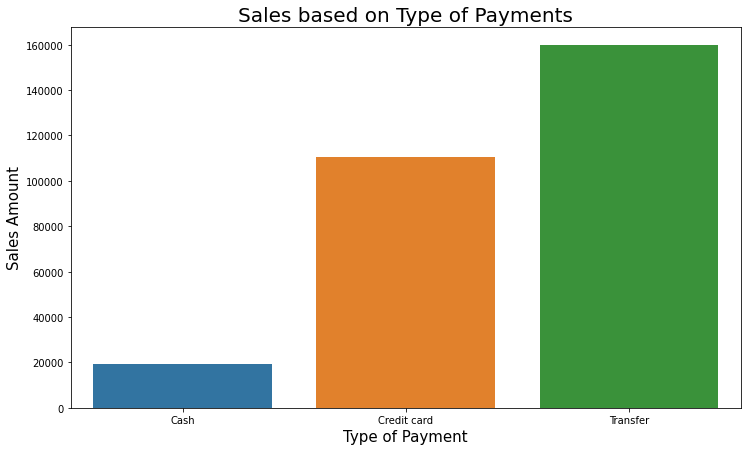

In [ ]:
# Sales over payments

sales_on_payments = sales.groupby('payment').agg({'total': 'sum'}).reset_index()

sns.barplot(x='payment', y='total', data=sales_on_payments)
plt.xlabel("Mode of Payment", fontdict={'fontsize': 15})
plt.ylabel("Sales Amount", fontdict={'fontsize': 15})
plt.title("Sales based on Type of Payments", fontdict={'fontsize': 20})

In [ ]:
# Sales in numbers

total_sales = sales_on_payments['total'].sum()

print("Sales in individual payments")
print(sales_on_payments)
(sales_on_payments.set_index('payment', drop=True) / total_sales) * 100

Sales in individual payments
       payment      total
0         Cash   19199.10
1  Credit card  110271.57
2     Transfer  159642.33


,total
payment,
Cash,6.640691
Credit card,38.141339
Transfer,55.217970


It's seems quite obvious, from the numbers that most of the payments are in the form of Transfer's(either Bank Trnsfers or Wallets Transfers), which is a little more than 50% followed by Credit Card(38%), and the least mode of payments is the Cash, approx 7%

### ❓ Question 2: Average Price of Product lines?

The second question is: **What is the average unit price for each product line?**
In this, I will be using the viz to see average unit price of various product lines.

### 📝 Answer 2

Text(0.5, 1.0, 'Average Price per Product line')

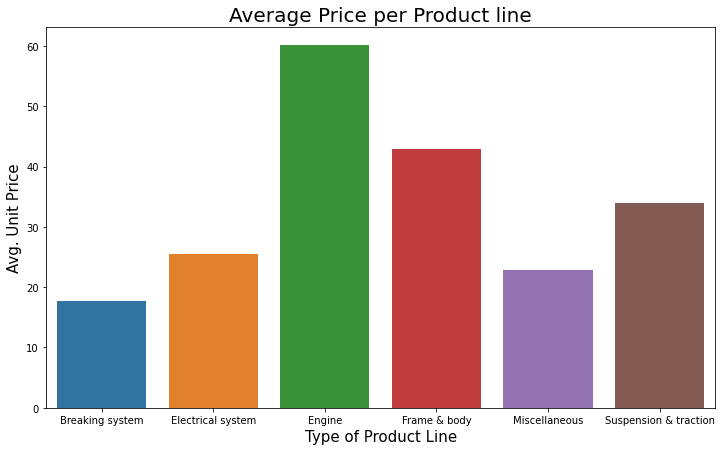

In [ ]:
# Average Price per Product line

price_on_product_line = sales.groupby('product_line').agg({'unit_price': 'mean'}).reset_index()

sns.barplot(x='product_line', y='unit_price', data=price_on_product_line)
plt.xlabel("Type of Product Line", fontdict={'fontsize': 15})
plt.ylabel("Avg. Unit Price", fontdict={'fontsize': 15})
plt.title("Average Price per Product line", fontdict={'fontsize': 20})

In [ ]:
# Avg. Price in numbers

price_on_product_line.sort_values(['unit_price'], ascending=False)

,product_line,unit_price
2,Engine,60.091803
3,Frame & body,42.832229
5,Suspension & traction,33.969868
1,Electrical system,25.585130
4,Miscellaneous,22.810738
0,Breaking system,17.740522


The Product Line with the highest Unit Price is the **Engine** followed by Frame & Body, Suspension & Traction, and with the least Price is the **Breaking System**.

My intution is that, the product which is most repaired/most sold will be at lower price as the demand is huge and vice versa.
> May or May not be true, which can be found from some extra analysis

### ❓ Question 3: Average Price of Product lines?

The third question is: **Create plots to visualize findings for questions 1 and 2**
I have already done these in the previous task.

### 📝 Answer 3

### ❓ Question 4: eXtend your investigation

The fourth question is: **Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)**

> This is an Optional Question

In [ ]:
# Function for generlization(plots)

def plot_columns(cat_col, num_col, agg_func):
    cat_on_num = sales.groupby(cat_col).agg({num_col: agg_func}).reset_index()
    
    sns.barplot(x=cat_col, y=num_col, data=cat_on_num)
    plt.xlabel(cat_col.capitalize(), fontdict={'fontsize': 15})
    plt.ylabel(f"{agg_func.capitalize()} of {num_col.capitalize()}", fontdict={'fontsize': 15})
    plt.title(f"{cat_col.capitalize()} vs {num_col.capitalize()}({agg_func.capitalize()})", fontdict={'fontsize': 20})

### 📝 Answer 4

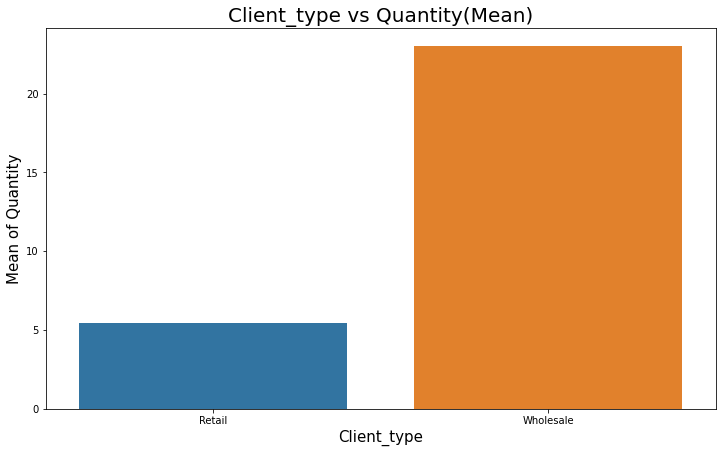

In [ ]:
# Plot Average Purchase by Client Type

plot_columns('client_type', 'quantity', 'mean')

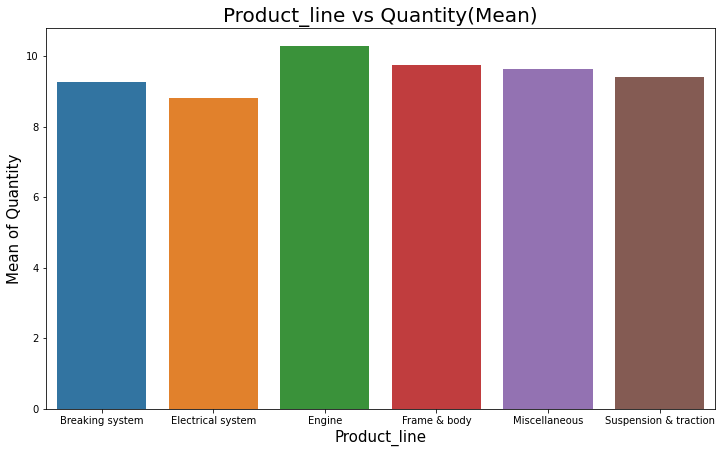

In [ ]:
plot_columns('product_line', 'quantity', 'mean')


## ❓ Question 5: Write Report
The fifth question is: Summarize your findings.

### 📝 Answer 5